# **ULTRA HIGH FREQUENCY (SEC BY SEC) ---ACD MODELLING**

In [ ]:
library(fGarch)

In [2]:
import pandas as pd

# **DATA DESCRIPTION**

The UHF dataset, relating to BMW for Jan 2008, encompasses a comprehensive record of stock market transactions, capturing various attributes crucial for market analysis. It comprises observations spanning over multiple days, with a total of 56,246 entries. Each observation includes details such as the day, month, and year of the transaction, alongside the precise time at which it occurred. Notably, the dataset tracks both the price and volume of stocks traded, providing valuable insights into market trends and investor behavior.

In [1]:
#### HFD ACD etc
X=read.table("UHF-BMW-Jan-2008-2weeks.txt", header=TRUE)
head(X)
tail(X)

,Day,M,Y,Day.N,Time,Time.X,Price,Volume
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>
1,2,1,8,1,09:00:15.260,9004.239,42.79,44127
2,2,1,8,1,09:00:20.046,9005.568,42.77,52
3,2,1,8,1,09:00:25.577,9007.105,42.77,1300
4,2,1,8,1,09:00:29.333,9008.148,42.77,131
5,2,1,8,1,09:00:29.426,9008.174,42.75,1194
6,2,1,8,1,09:00:39.687,9011.024,42.73,120


,Day,M,Y,Day.N,Time,Time.X,Price,Volume
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>
56241,15,1,8,14,17:29:09.478,17485.97,40.00,423
56242,15,1,8,14,17:29:13.639,17487.12,40.03,880
56243,15,1,8,14,17:29:38.172,17493.94,40.05,858
56244,15,1,8,14,17:29:48.338,17496.76,40.03,815
56245,15,1,8,14,17:29:48.343,17496.76,40.02,226
56246,15,1,8,14,17:35:27.339,17590.93,39.90,499619


# **STATISTICAL SUMMARY**

This elucidates the dataset's characteristics, revealing a range of values for each variable. For instance, the price of stocks fluctuates between 39.68  and 43.62, with a mean price of approximately 41.89. Similarly, the volume of stocks traded varies widely, with a minimum of 1 unit and a maximum of 646,564 units, showcasing the diversity and scale of market activity. This dataset serves as a rich resource for conducting in-depth analyses to discern patterns, trends, and anomalies within the stock market landscape. For our study, 2 days could be considered, 07.01.2023 to 08.01.2023.

In [2]:
#checking stats summary of data
str(X)
summary(X)

'data.frame':	56246 obs. of  8 variables:
 $ Day   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ M     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Y     : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Day.N : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Time  : chr  "09:00:15.260" "09:00:20.046" "09:00:25.577" "09:00:29.333" ...
 $ Time.X: num  9004 9006 9007 9008 9008 ...
 $ Price : num  42.8 42.8 42.8 42.8 42.8 ...
 $ Volume: int  44127 52 1300 131 1194 120 20 339 55 5069 ...


      Day              M           Y         Day.N           Time          
 Min.   : 2.00   Min.   :1   Min.   :8   Min.   : 1.00   Length:56246      
 1st Qu.: 4.00   1st Qu.:1   1st Qu.:8   1st Qu.: 3.00   Class :character  
 Median : 8.00   Median :1   Median :8   Median : 7.00   Mode  :character  
 Mean   : 8.41   Mean   :1   Mean   :8   Mean   : 7.41                     
 3rd Qu.:11.00   3rd Qu.:1   3rd Qu.:8   3rd Qu.:10.00                     
 Max.   :15.00   Max.   :1   Max.   :8   Max.   :14.00                     
     Time.X          Price           Volume        
 Min.   : 9001   Min.   :39.68   Min.   :     1.0  
 1st Qu.:10912   1st Qu.:41.49   1st Qu.:   229.0  
 Median :13822   Median :42.06   Median :   500.0  
 Mean   :13491   Mean   :41.89   Mean   :   925.2  
 3rd Qu.:16018   3rd Qu.:42.38   3rd Qu.:  1000.0  
 Max.   :17591   Max.   :43.62   Max.   :646564.0  

In [3]:
D1=6 # on the 10. Jan 2008, with a common featureok, 1  2  3  6  7  8  9 10 13 14
D2=7 # on the 11. of Jan 2008, with smiling figure

# **REALISED VOLATILITIES (RV)**

In [4]:
#### Define the variables. Note that the time variables are not equidistant.
BMW.T1=X$Time.X[X$Day.N==D1]/1000  #### on 07-01-2008
BMW1=X$Price[X$Day.N==D1]
n1=length(BMW1)

BMW.T2=X$Time.X[X$Day.N==D2]/1000  #### on 08-01-2008
BMW2=X$Price[X$Day.N==D2]
n2=length(BMW2)
#### n1 and n2 are the numbers of observations on both days.
#### They are random variables and quite different.
#### Note that, like in a returns series, there is a difference in the time point,
#### caused by the differences (durations are differences of observation time)

In [5]:
BMW1.Ret=diff(log(BMW1))
BMW2.Ret=diff(log(BMW2))

In [6]:
#### Calculating the RVs on those two days
BMW1.RV=sum(BMW1.Ret^2)
BMW2.RV=sum(BMW2.Ret^2)
BMW1.RV
BMW2.RV

[1] 0.001086216

[1] 0.0005992377

The realized volatility represents the degree of price change on a certain trading day. The higher the value, the greater the volatility and the greater the price fluctuation on that day.

BMW stock's realized volatility was 0.001086216 on January 7, 2008, indicating relatively higher intraday price action compared to the realized volatility of 0.0005992377 on January 8, 2008. The higher 7-day RV may reflect the market's reaction to certain events or news affecting the auto industry or the broader stock market, resulting in a more volatile trading environment. The next day's decline in RV indicated a calmer market with fewer sudden price changes. This could be due to a lack of significant market-moving news or a possible stabilization after the previous day's volatility. Investors and traders use realized volatility to assess the risk associated with an asset. Higher volatility generally means higher risk, but also the potential for higher returns. Based on the data presented, the increase in realized volatility may be of interest to short-term traders looking to profit from larger price movements.

# **STOCK PRICE MOVEMENT, UHF LOG RETURNS & STOCK PRICE DURATION**

In [7]:
#### calculating the durations in seconds
BMW.Dur1=diff(BMW.T1)*3600
BMW.Dur2=diff(BMW.T2)*3600

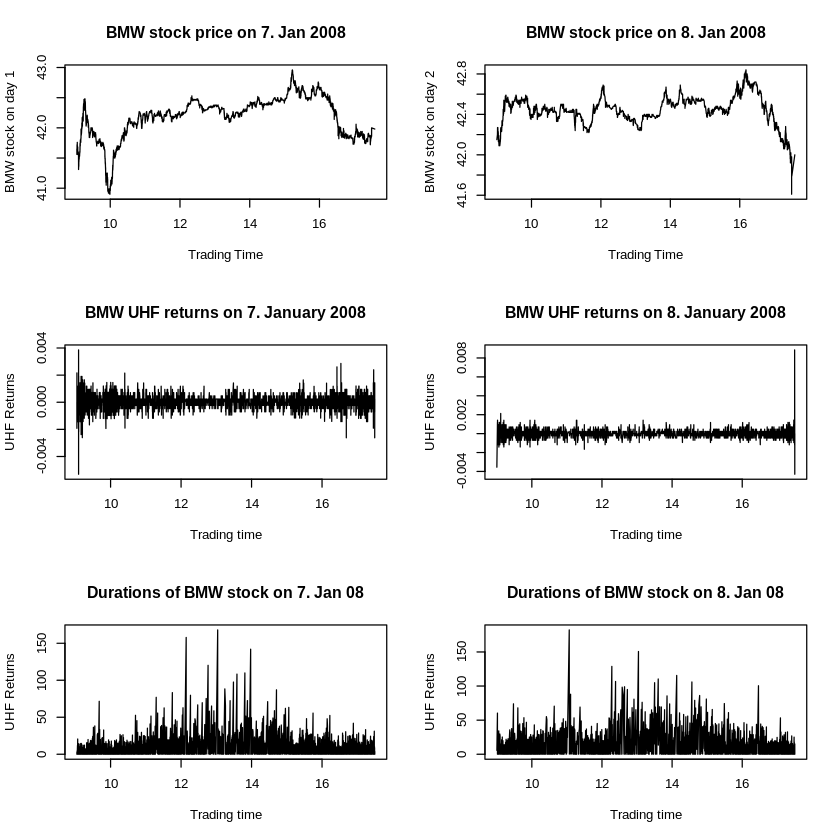

In [11]:
#### Figure 1 Price, Returns and Durations
par(mfrow=c(3,2))

matplot(BMW.T1[2:n1], BMW1[2:n1], type="l", xlab="Trading Time", ylab="BMW stock on day 1")
title("BMW stock price on 7. Jan 2008")
matplot(BMW.T2[2:n2], BMW2[2:n2], type="l", xlab="Trading Time", ylab="BMW stock on day 2")
title("BMW stock price on 8. Jan 2008")

plot(BMW.T1[2:(n1-1)], BMW1.Ret[1:(n1-2)], type="l", xlab="Trading time", ylab="UHF Returns")
title("BMW UHF returns on 7. January 2008")
plot(BMW.T2[2:(n2-1)], BMW2.Ret[1:(n2-2)], type="l", xlab="Trading time", ylab="UHF Returns")
title("BMW UHF returns on 8. January 2008")

plot(BMW.T1[2:(n1-1)], BMW.Dur1[1:(n1-2)], type="l", xlab="Trading time", ylab="UHF Returns")
title("Durations of BMW stock on 7. Jan 08")
plot(BMW.T2[2:(n2-1)], BMW.Dur2[1:(n2-2)], type="l", xlab="Trading time", ylab="UHF Returns")
title("Durations of BMW stock on 8. Jan 08")



*   In the 1st row, we observe the intraday behavior of BMW stock prices on January 7-8, 2008. On January 7, the price started at around 41.8 euros, experienced some fluctuations, then trended downward to around 41.6 euros, before recovering slightly to around the closing price. starting point. The next day, January 8, a similar pattern emerged, with the opening price around €41.6, and after a brief rise, the stock experienced a sharp decline in the late afternoon, closing significantly lower than where it had opened. These patterns indicate possible reactions to specific market information or broader economic news released during trading hours.

* Next, UHF returns over these two days show significant intraday fluctuations with no clear long-term trend, suggesting a degree of stationarity. In this context, stationarity means that the mean and variance of returns do not change over time within a trading day, which is a key assumption in many financial models. There are clear spikes on both days, indicating that temporary events or transactions can cause sudden price changes. However, most of the data cluster around the baseline, which means that price changes are relatively stable and return to the mean, which is consistent with the concept of financial time series stationarity.



* And Lastly, the duration plots on January 7th and 8th exhibit a significant range in the time between trades, indicative of the liquidity and trading frequency. Notably, on January 8th, there is a period in the late afternoon where the durations between trades increase dramatically, corresponding to the time when the stock price drops significantly. This could suggest a momentary drop in liquidity or a decrease in trading activity. Conversely, periods with very short durations, indicating more frequent trading, could be associated with the arrival of new information or increased market participant activity. These fluctuations in duration are critical for market makers and traders, as they reflect the underlying market dynamics and can influence decision-making related to trade execution and strategy development.






# **ACD MODELLING with GARCH APPROACH**

In [15]:
#### fitting the  ACD models using different methods
n11=n1-2
d1i=sign(rnorm(n11))
BMW1.srs=sqrt(BMW.Dur1[1:n11])*d1i

n21=n2-2
d2i=sign(rnorm(n21))
BMW2.srs=sqrt(BMW.Dur2[1:n21])*d2i
#### Numbers of durations are n1-1 and n2-1, respectively.
#### The last is with very poor quality and is removed.
#### That is one duration fewer is used.

In [17]:
BMW1.ACDg=garchFit(~garch(1,1), data=BMW1.srs, include.mean=FALSE, trace=FALSE)
BMW2.ACDg=garchFit(~garch(1,1), data=BMW2.srs, include.mean=FALSE, trace=FALSE)

summary(BMW1.ACDg)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = BMW1.srs, include.mean = FALSE, 
    trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x5ab147c52de0>
 [data = BMW1.srs]

Conditional Distribution:
 norm 

Coefficient(s):
   omega    alpha1     beta1  
0.024134  0.051528  0.943143  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega   0.024134    0.005318    4.538 5.69e-06 ***
alpha1  0.051528    0.005413    9.518  < 2e-16 ***
beta1   0.943143    0.005963  158.161  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -15843.52    normalized:  -2.007287 

Description:
 Thu Mar 21 19:17:46 2024 by user:  


Standardised Residuals Tests:
                                 Statistic    p-Value
 Jarque-Bera Test   R    Chi^2  553.728812 0.00000000
 Shapiro-Wilk Test  R    W              NA         NA
 Ljung-Box Test     R    Q(10)    7.84819

**Fitted model on 7 Jan 2008 :**

Vt =   ψtet,   ⏟(eti.i.d.)    χ2(1)

Ψt = 0.024134 + 0.051528Vt−1 + 0.943143ψt−1

The GARCH model coefficients are ω = 0.024134, α1 = 0.051528, and β1 = 0.943143. These coefficients suggest that past squared residuals (α1) and lagged conditional variances (β1) have significant contributions to the prediction of current volatility, with β1 indicating a strong persistence in volatility over time. The residual tests show no significant autocorrelations in standardized residuals but some in squared residuals, which may suggest volatility clustering. The model's AIC and BIC are 4.015335 and 4.017986, respectively.


In [18]:
summary(BMW2.ACDg)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = BMW2.srs, include.mean = FALSE, 
    trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x5ab14c31d798>
 [data = BMW2.srs]

Conditional Distribution:
 norm 

Coefficient(s):
   omega    alpha1     beta1  
0.078202  0.047236  0.939546  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega   0.078202    0.025269    3.095  0.00197 ** 
alpha1  0.047236    0.008542    5.530 3.21e-08 ***
beta1   0.939546    0.012110   77.587  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 -11543.78    normalized:  -2.255084 

Description:
 Thu Mar 21 19:17:47 2024 by user:  


Standardised Residuals Tests:
                                 Statistic     p-Value
 Jarque-Bera Test   R    Chi^2  497.830216 0.000000000
 Shapiro-Wilk Test  R    W              NA          NA
 Ljung-Box Test     R    Q(10)    4.95

**Fitted model on 8 Jan 2008 :**

Vt =   ψtet,   ⏟(eti.i.d.)    χ2(1)

Ψt = 0.078202 + 0.047236Vt−1 + 0.939546ψt−1

On January 8th, 2008 (BMW2), the estimated parameters for the GARCH model are ω = 0.078202, α1 = 0.047236, and β1 = 0.939546. While the omega coefficient is larger compared to the previous day, indicating higher baseline volatility, the persistence of volatility remains high as reflected by β1. The AIC and BIC for this day's model are 4.511341 and 4.515174, respectively, which are higher than those for BMW1 (07.01.2023), suggesting a slightly less efficient model fit compared to the previous day.



Overall, the GARCH (1,1) models for both days highlight the intricate dynamics of financial market volatility, emphasizing the importance of past volatility in predicting future volatility. Despite the differences in baseline volatility levels between the two days, as indicated by the omega coefficient, the consistency in volatility persistence underscores the underlying market mechanisms that affect BMW's stock volatility. The models, along with AIC and BIC values, provide a quantitative framework for comparing the volatility structures across different days, which is crucial for financial risk management and strategic trading decisions.


# **RESIDUAL DIAGNOSTICS OVERVIEW**

P-value significance is usually determined by a threshold, usually 0.05. Values below this threshold indicate statistical significance, indicating that the model's residuals exhibit autocorrelation (for the Ljung-Box test) or heteroskedasticity (for the LM-arc test). "NA" indicates that the test result is not available, which may occur in some statistical tests if the data does not meet the test requirements. Residual tests, specifically Ljung-Box and LM-Arch tests of squared residuals, indicate significant autocorrelation in volatility, consistent with the presence of GARCH effects. This is confirmed by the significant α and β coefficients capturing the ARCH and GARCH effects respectively.

The model summaries will be used to discuss how the Ljung-Box Test on squared residuals (R^2) for both BMW1 and BMW2, along with the LM Arch Test for BMW2, show significant results, suggesting the presence of GARCH effects. Non-significant p-values for the Ljung-Box Test on R indicate that there is no autocorrelation in the standardized residuals at the traditional levels of significance, affirming the model's adequacy in capturing the linear dependencies in the data. The significant Jarque-Bera test results imply non-normality in the distribution of residuals, which is typical for financial return series.

# **ESTIMATED DURATION & STANDARDIZED RESIDUALS**

In [19]:
BMW1.cd.t=BMW1.ACDg@h.t
BMW2.cd.t=BMW2.ACDg@h.t

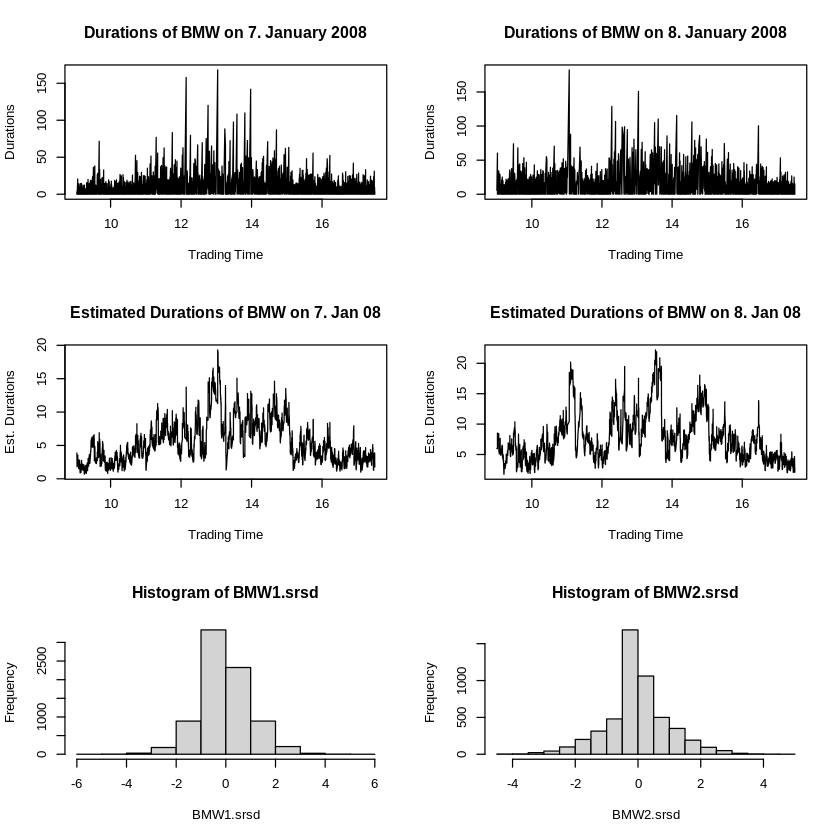

In [20]:
#### Figure 2 Durations, conditional mean durations, histogram of conditinal dis
par(mfrow=c(3,2))
plot(BMW.T1[2:(n1-1)], BMW.Dur1[1:(n1-2)], type="l", xlab="Trading Time", ylab="Durations")
title("Durations of BMW on 7. January 2008")
plot(BMW.T2[2:(n2-1)], BMW.Dur2[1:(n2-2)], type="l", xlab="Trading Time", ylab="Durations")
title("Durations of BMW on 8. January 2008")
plot(BMW.T1[2:(n1-1)], BMW1.cd.t, type="l", xlab="Trading Time", ylab="Est. Durations")
title("Estimated Durations of BMW on 7. Jan 08")
plot(BMW.T2[2:(n2-1)], BMW2.cd.t, type="l", xlab="Trading Time", ylab="Est. Durations")
title("Estimated Durations of BMW on 8. Jan 08")

BMW1.srsd=BMW1.srs/sqrt(BMW1.cd.t)
BMW2.srsd=BMW2.srs/sqrt(BMW2.cd.t)
hist(BMW1.srsd)
hist(BMW2.srsd)



*   The 2nd row presents estimated durations based on the modeling, the smoothing or estimation technique applied to the actual durations. These estimations reveal the underlying patterns in the trade durations by filtering out some of the noise. For both dates, the estimated durations display a less erratic profile than the actual durations, with the variation seeming more regular and less prone to the extreme values seen in the actual durations. The consistency of the estimated durations could be used to understand typical trade patterns or to identify anomalies in trading behavior.

*   Finally the row shows the distribution of the standardized residuals from the duration models for both days. They seem to follow a roughly normal distribution, centered around zero, which is a common assumption in many financial models. However, there is some evidence of deviations from normality, such as skewness or excess kurtosis, indicated by the tails of the distributions. The slightly heavier tails than what is expected in a normal distribution suggest that extreme values are more common than would be predicted by a Gaussian model, which is a typical characteristic in financial time series known as leptokurtosis.

